# LGBM & XGBM

**Exploratory Data Analysis (EDA):**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Titanic_test.csv')
df = pd.read_csv('/content/Titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
print(df.shape)

(891, 12)


In [9]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
# Missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


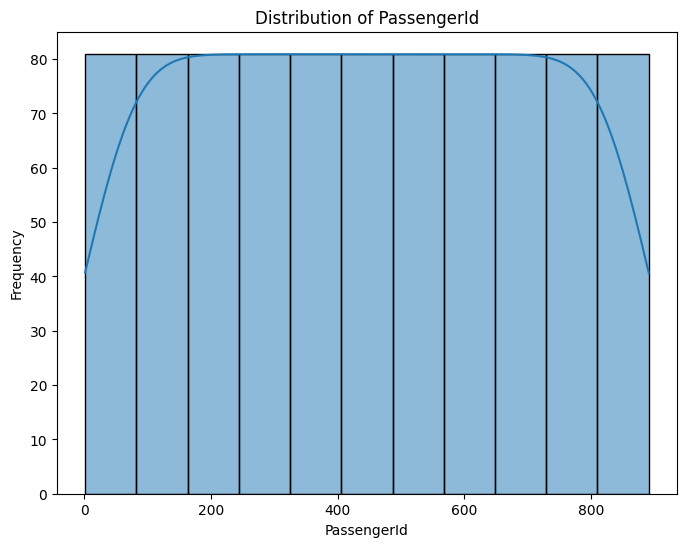

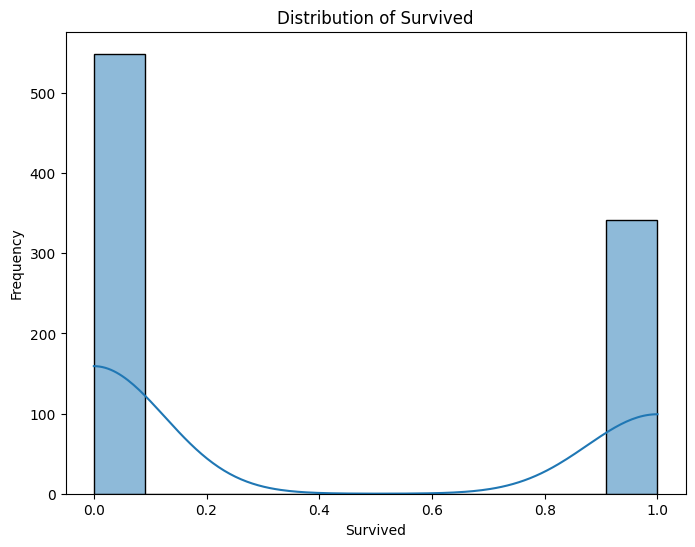

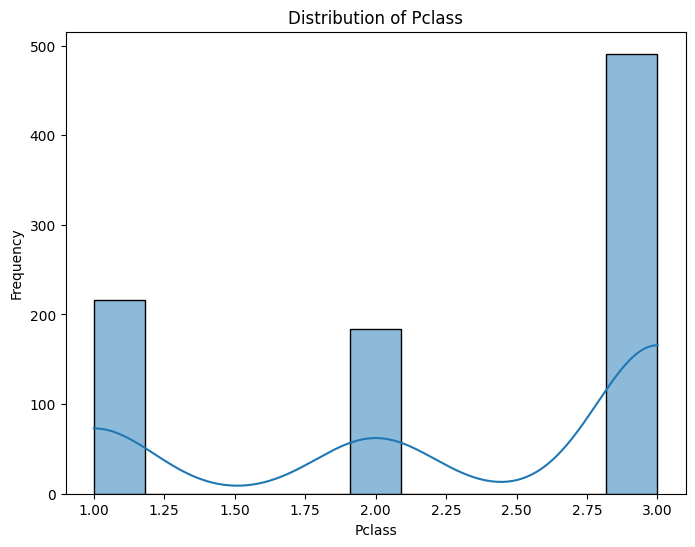

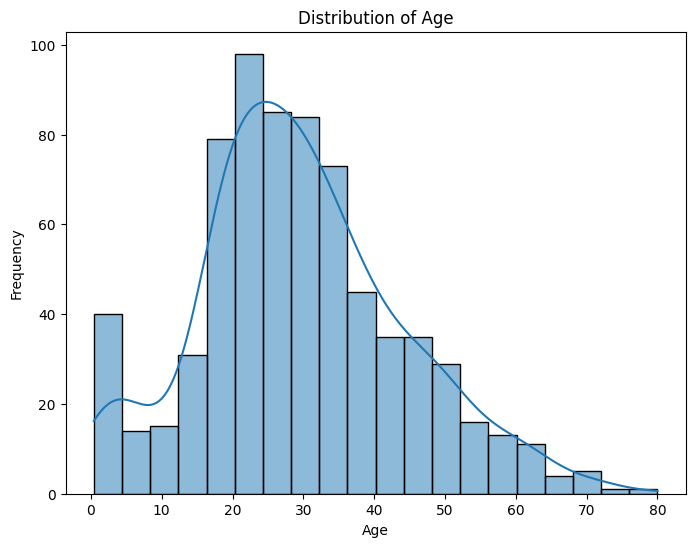

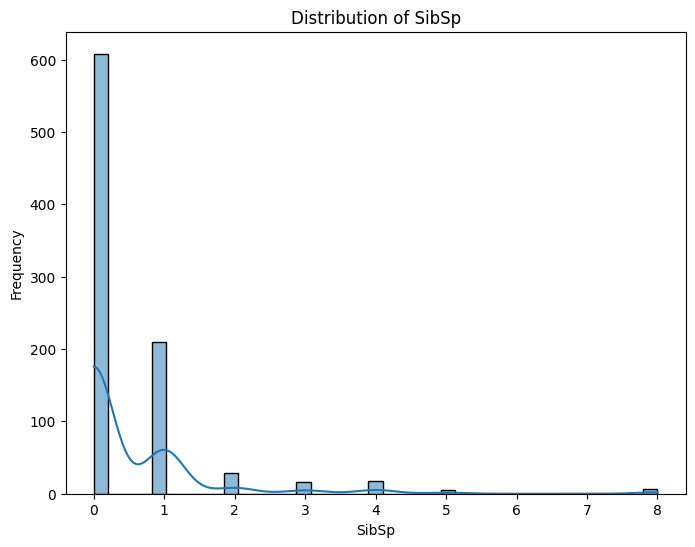

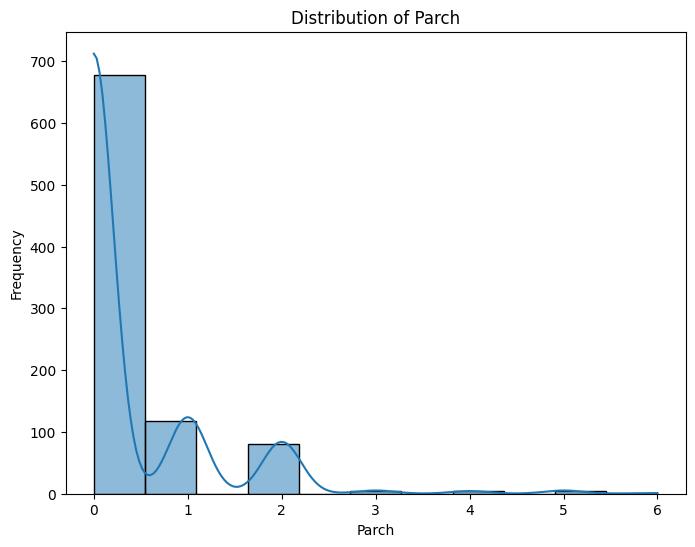

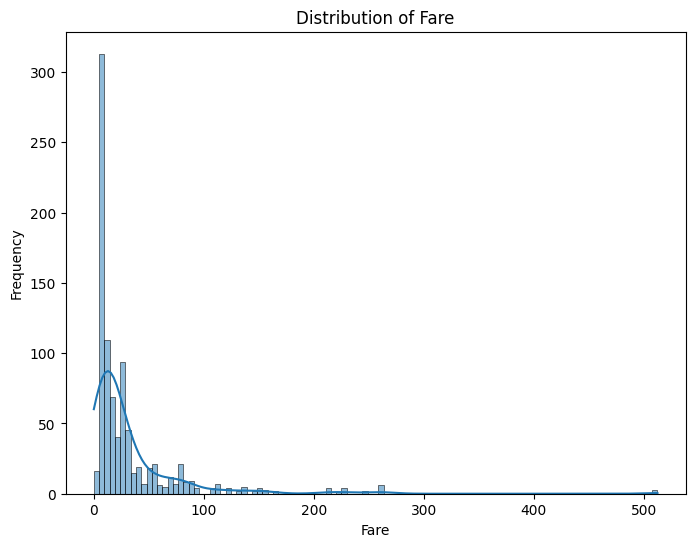

In [11]:
# Explore data distributions using histograms
numerical_features = df.select_dtypes(include=np.number).columns
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # Include KDE for better visualization
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

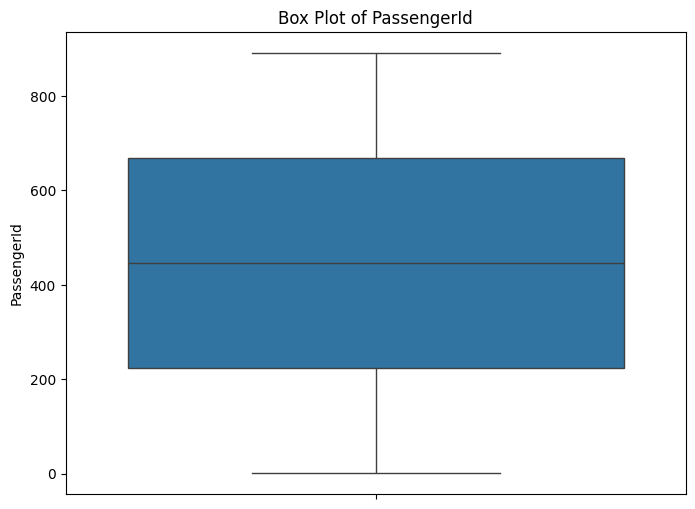

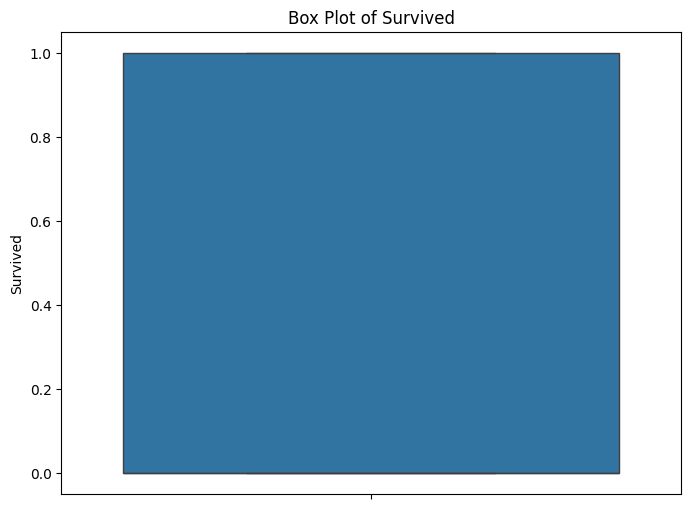

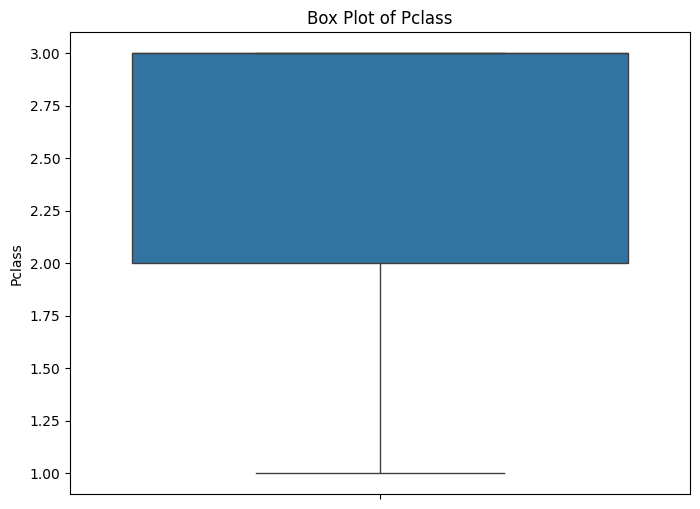

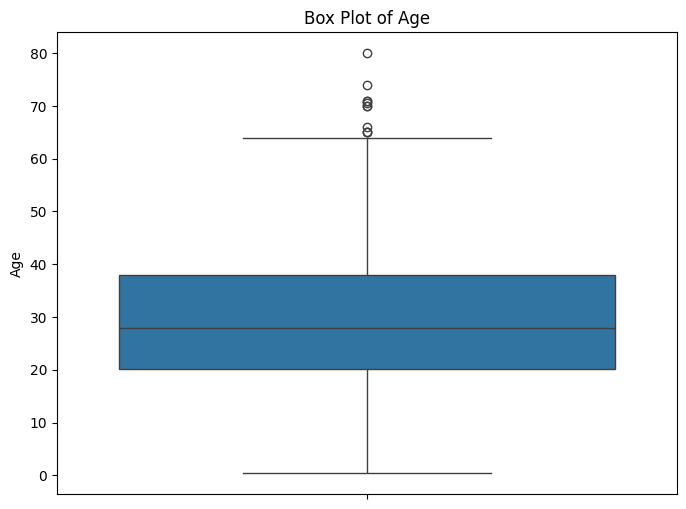

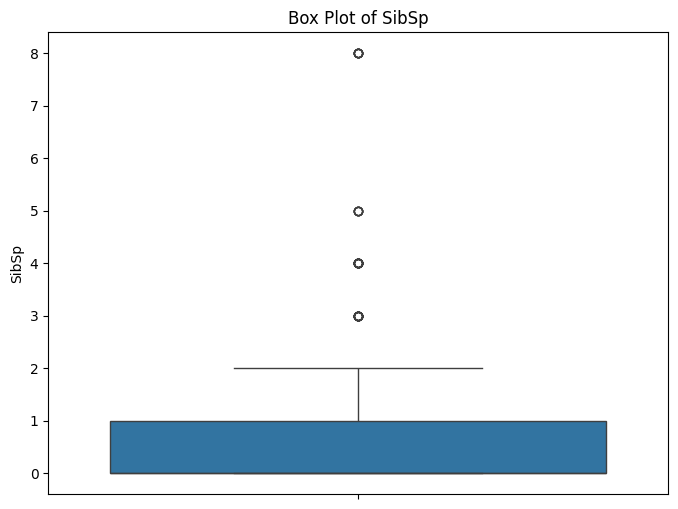

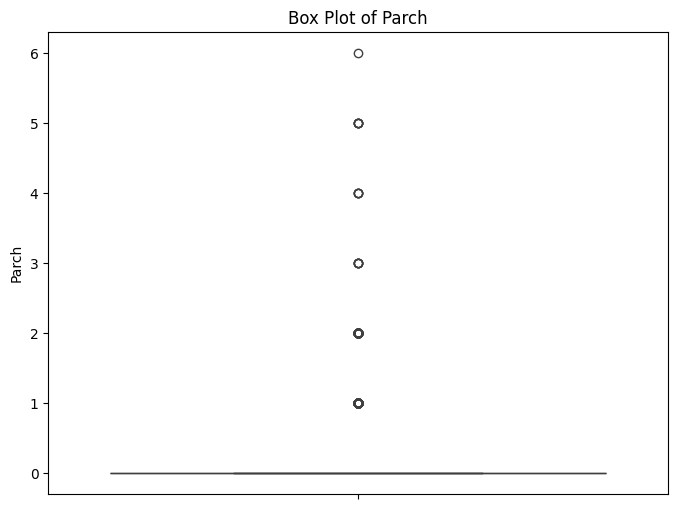

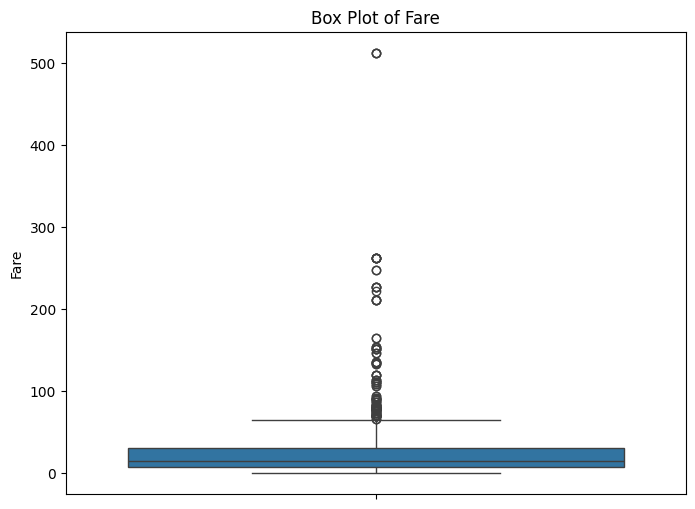

In [12]:
# Explore data distributions using box plots
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])  # Use 'y=' to plot vertically
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

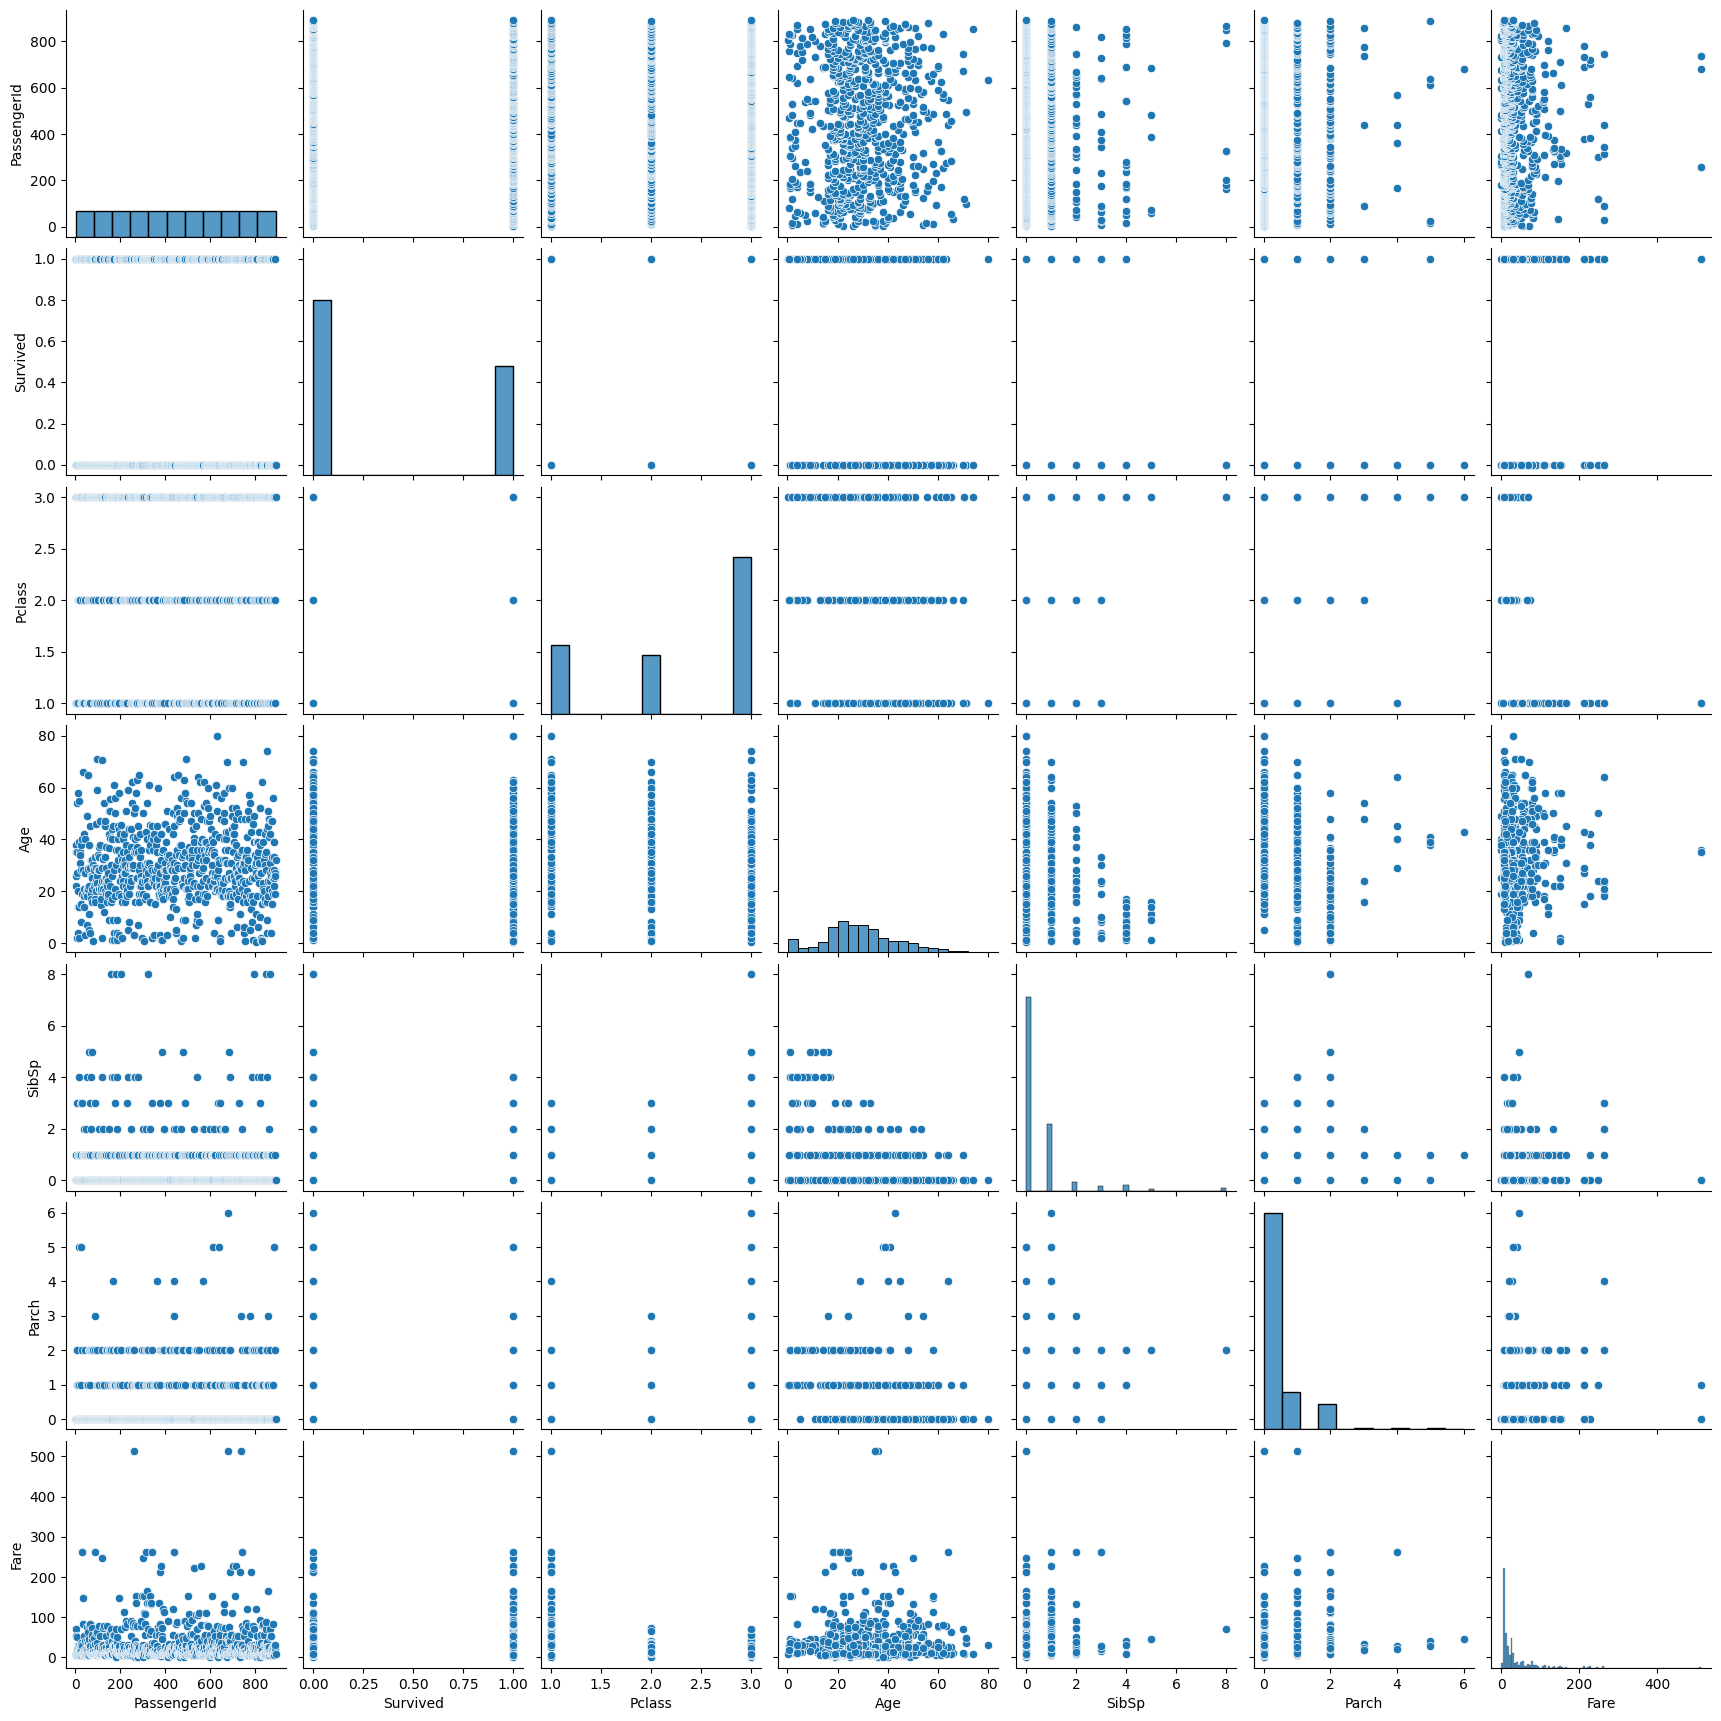

In [13]:
#Visualization
sns.pairplot(df)
plt.show()

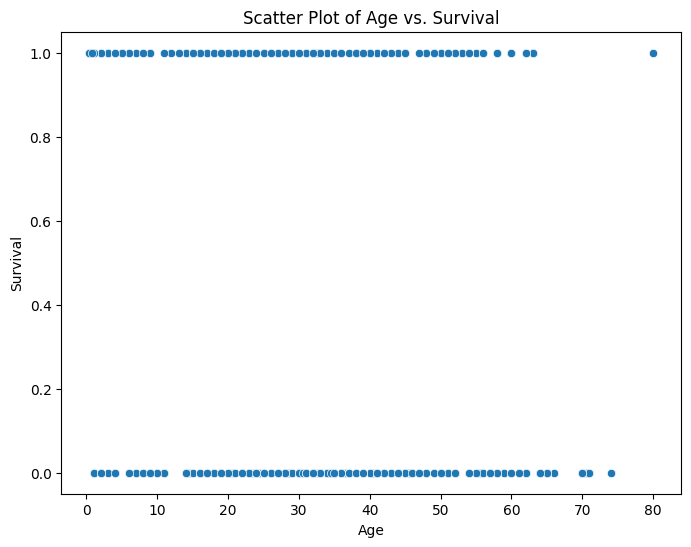

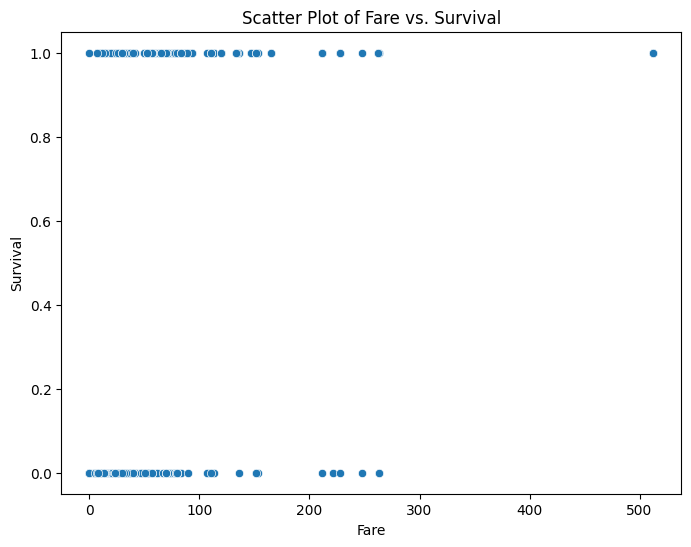

In [14]:
# Visualize relationships between features and survival using scatter plots
for col in ['Age', 'Fare']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Survived', data=df)
    plt.title(f'Scatter Plot of {col} vs. Survival')
    plt.xlabel(col)
    plt.ylabel('Survival')
    plt.show()

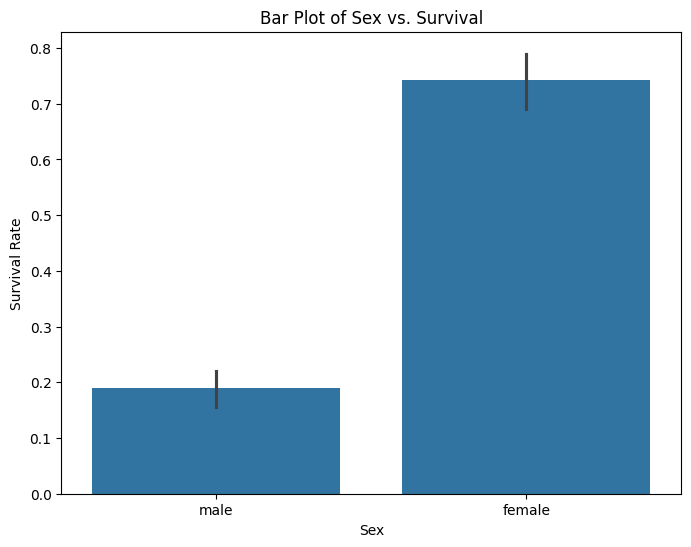

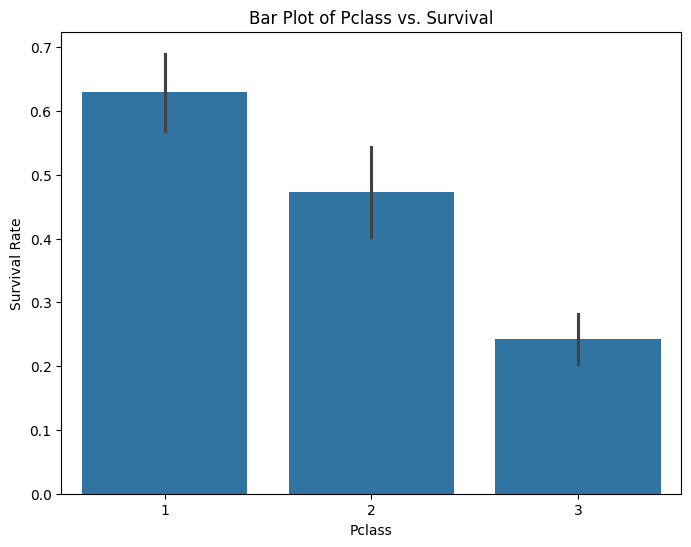

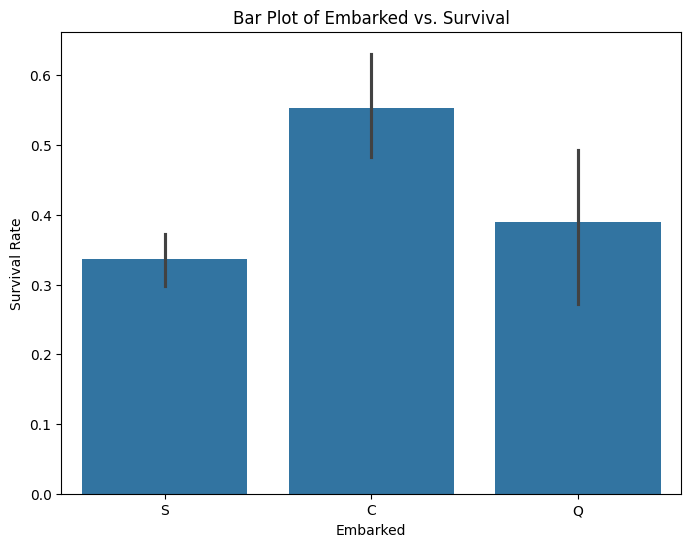

In [15]:
# Visualize relationships between categorical features and survival using bar plots
for col in ['Sex', 'Pclass', 'Embarked']:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y='Survived', data=df)
    plt.title(f'Bar Plot of {col} vs. Survival')
    plt.xlabel(col)
    plt.ylabel('Survival Rate')
    plt.show()

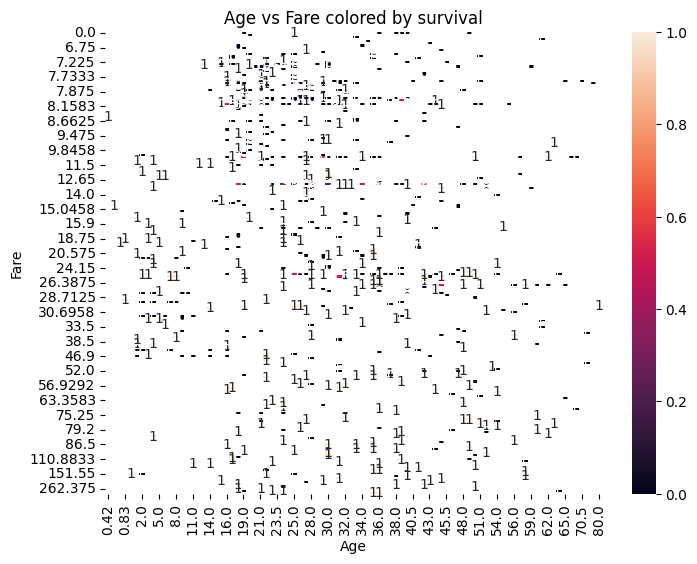

In [16]:
plt.figure(figsize=(8, 6))
heatmap_data = df.pivot_table(index='Fare', columns='Age', values='Survived')
sns.heatmap(data=heatmap_data, annot=True)
plt.title('Age vs Fare colored by survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

**Data Preprocessing:**

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
#Missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
df_one_hot = pd.get_dummies(df, columns=['Sex', 'Embarked'])
print("One-hot encoded DataFrame:")
print(df_one_hot)

One-hot encoded DataFrame:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                              

In [20]:
#Apply label encoding
label_encoder = LabelEncoder()
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
df['Embarked_encoded'] = label_encoder.fit_transform(df['Embarked'])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [21]:
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [22]:
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])
print("Scaled DataFrame:")
print(df)

Scaled DataFrame:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 

In [23]:
#Define preprocessing steps
# Define numerical_cols and categorical_cols
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_cols = ['Pclass', 'Sex', 'Embarked']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [24]:
#Apply preprocessing
df_preprocessed = preprocessor.fit_transform(df)
print("Preprocessed DataFrame:")
print(df_preprocessed)

Preprocessed DataFrame:
[[-0.53037664 -0.50244517  0.43279337 ...  0.          1.
   0.        ]
 [ 0.57183099  0.78684529  0.43279337 ...  0.          0.
   0.        ]
 [-0.25482473 -0.48885426 -0.4745452  ...  0.          1.
   0.        ]
 ...
 [        nan -0.17626324  0.43279337 ...  0.          1.
   0.        ]
 [-0.25482473 -0.04438104 -0.4745452  ...  0.          0.
   0.        ]
 [ 0.15850313 -0.49237783 -0.4745452  ...  1.          0.
   0.        ]]


**Building Predictive Models**

In [25]:
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train 20% test

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 15)
X_test shape: (179, 15)
y_train shape: (712,)
y_test shape: (179,)


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [27]:
# Impute missing numerical values with the median
for col in ['Age', 'Fare']:
    df[col] = df[col].fillna(df[col].median())

# Drop the 'Cabin' feature as it has numerous missing values - Optional
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# One-hot encode categorical features 'Embarked' and 'Sex' IF THEY HAVEN'T BEEN ENCODED
if 'Embarked' in df.columns and 'Sex' in df.columns:
    for col in ['Embarked', 'Sex']:
        # Create dummy variables for the column in the training set
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, dummies], axis=1)


    # Drop the original 'Embarked' and 'Sex' columns
    df.drop(['Embarked', 'Sex'], axis=1, inplace=True, errors='ignore')
    print("Columns 'Embarked' and 'Sex' have been encoded.")
else:
    print("Columns 'Embarked' and/or 'Sex' have likely already been encoded.")

Columns 'Embarked' and 'Sex' have been encoded.


In [28]:
# Identify columns with 'object' dtype (likely categorical)
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical features
for col in categorical_cols:
    # Create dummy variables for the column in the training set
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True, dummy_na=False)
    df = pd.concat([df, dummies], axis=1)

    # Drop the original columns
    df.drop(columns=[col], inplace=True)

In [29]:
# Split the data again after encoding
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test using SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now try fitting the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# After training the model:
y_pred = model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Now print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Accuracy: 0.8212290502793296
Precision: 0.7692307692307693
Recall: 0.8108108108108109
F1-score: 0.7894736842105263
Confusion Matrix:


array([[87, 18],
       [14, 60]])

In [31]:
!pip install lightgbm xgboost

import lightgbm as lgb
import xgboost as xgb

In [32]:
# LightGBM Model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [33]:
# Evaluate LightGBM
lgb_accuracy = accuracy_score(y_test, lgb_pred)
print(f"LightGBM Accuracy: {lgb_accuracy}")

LightGBM Accuracy: 0.8268156424581006


In [34]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


In [35]:
# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.7988826815642458


In [36]:
# Train and evaluate Logistic Regression
# LightGBM Model
# XGBoost Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    return accuracy, precision, recall, f1

In [37]:
print("Evaluating Logistic Regression:")
evaluate_model(model, X_test, y_test)

print("\nEvaluating LightGBM:")
evaluate_model(lgb_model, X_test, y_test)

print("\nEvaluating XGBoost:")
evaluate_model(xgb_model, X_test, y_test)

Evaluating Logistic Regression:
Accuracy: 0.8212290502793296
Precision: 0.7692307692307693
Recall: 0.8108108108108109
F1-score: 0.7894736842105263
Confusion Matrix:
[[87 18]
 [14 60]]

Evaluating LightGBM:
Accuracy: 0.8268156424581006
Precision: 0.8028169014084507
Recall: 0.7702702702702703
F1-score: 0.7862068965517242
Confusion Matrix:
[[91 14]
 [17 57]]

Evaluating XGBoost:
Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
Recall: 0.7297297297297297
F1-score: 0.75
Confusion Matrix:
[[89 16]
 [20 54]]


(0.7988826815642458, 0.7714285714285715, 0.7297297297297297, 0.75)

In [38]:
!pip install scikit-learn

In [39]:
from sklearn.metrics import accuracy_score, classification_report

In [40]:
# Identify existing one-hot encoded 'Embarked' columns
# Get feature names from the original DataFrame (df) before it was transformed
embarked_cols = [col for col in df.columns if 'Embarked_' in col]

# Remove duplicate one-hot encoded 'Embarked' columns, keeping the first instance
if len(embarked_cols) > 1:
    # Get the indices of the columns to drop in the NumPy array
    cols_to_drop_indices = [df.columns.get_loc(col) for col in embarked_cols[1:]]

    # Drop the columns from the NumPy arrays using indexing
    X_train = np.delete(X_train, cols_to_drop_indices, axis=1)
    X_test = np.delete(X_test, cols_to_drop_indices, axis=1)

# LightGBM Model (continue with your model building)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [41]:
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

lgb_model = lgb.train(params,
                      lgb_train,
                      num_boost_round=100,
                      valid_sets=lgb_test)

y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred_lgb_class = [1 if prob > 0.5 else 0 for prob in y_pred_lgb]

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.130998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [42]:
# XGBoost Model
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',  # or 'auc'
    'eta': 0.05,  # Learning rate
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

xgb_model = xgb.train(params,
                      xgb_train,
                      num_boost_round=100,  # Adjust the number of boosting rounds
                      evals=[(xgb_train, 'train'), (xgb_test, 'test')])

y_pred_xgb = xgb_model.predict(xgb_test)
y_pred_xgb_class = [1 if prob > 0.5 else 0 for prob in y_pred_xgb]


[0]	train-logloss:0.63813	test-logloss:0.65892
[1]	train-logloss:0.61783	test-logloss:0.63856
[2]	train-logloss:0.59948	test-logloss:0.62202
[3]	train-logloss:0.58242	test-logloss:0.60720
[4]	train-logloss:0.56500	test-logloss:0.59113
[5]	train-logloss:0.54853	test-logloss:0.57617
[6]	train-logloss:0.53579	test-logloss:0.56284
[7]	train-logloss:0.52116	test-logloss:0.55070
[8]	train-logloss:0.50921	test-logloss:0.53878
[9]	train-logloss:0.49829	test-logloss:0.52937
[10]	train-logloss:0.48710	test-logloss:0.51936
[11]	train-logloss:0.47643	test-logloss:0.51020
[12]	train-logloss:0.46713	test-logloss:0.50325
[13]	train-logloss:0.45785	test-logloss:0.49605
[14]	train-logloss:0.44878	test-logloss:0.49000
[15]	train-logloss:0.44414	test-logloss:0.48649
[16]	train-logloss:0.43661	test-logloss:0.48013
[17]	train-logloss:0.42939	test-logloss:0.47309
[18]	train-logloss:0.42476	test-logloss:0.47073
[19]	train-logloss:0.41761	test-logloss:0.46516
[20]	train-logloss:0.41335	test-logloss:0.46207
[2

In [43]:
# Evaluate the models
print("LightGBM Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb_class)}")
print(classification_report(y_test, y_pred_lgb_class))

print("\nXGBoost Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_class)}")
print(classification_report(y_test, y_pred_xgb_class))

LightGBM Evaluation:
Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179


XGBoost Evaluation:
Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



**Comparative Analysis:**

In [44]:
# Create a dictionary to store the results
results = {
    'Model': ['Logistic Regression', 'LightGBM', 'XGBoost'],
    'Accuracy': [accuracy, lgb_accuracy, xgb_accuracy],  # Replace with actual values
    'Precision': [precision, precision_score(y_test, lgb_pred), precision_score(y_test, xgb_pred)],
    'Recall': [recall, recall_score(y_test, lgb_pred), recall_score(y_test, xgb_pred)],
    'F1-score': [f1, f1_score(y_test, lgb_pred), f1_score(y_test, xgb_pred)]
}


results_df = pd.DataFrame(results)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.821229   0.769231  0.810811  0.789474
1             LightGBM  0.826816   0.802817  0.770270  0.786207
2              XGBoost  0.798883   0.771429  0.729730  0.750000


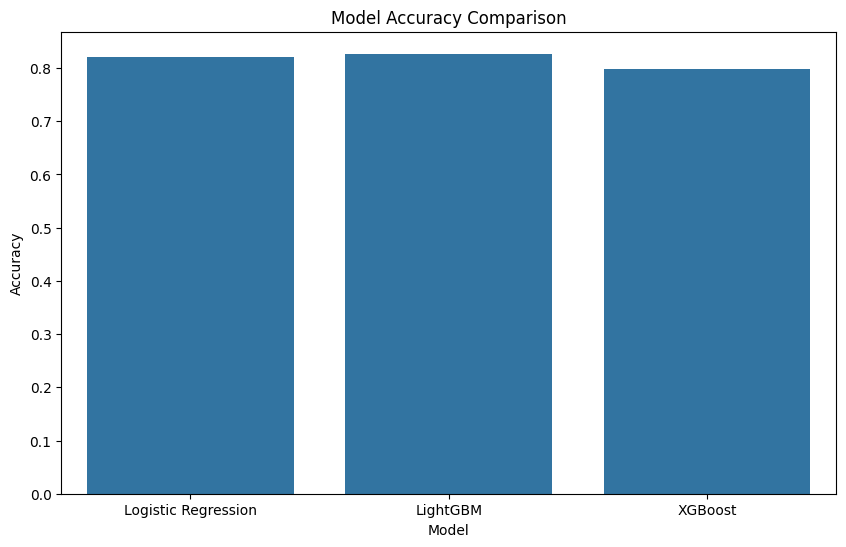

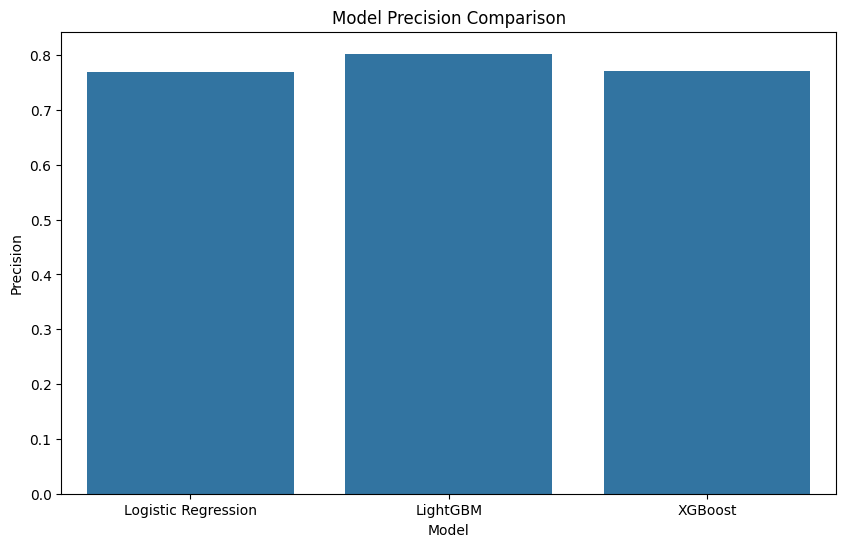

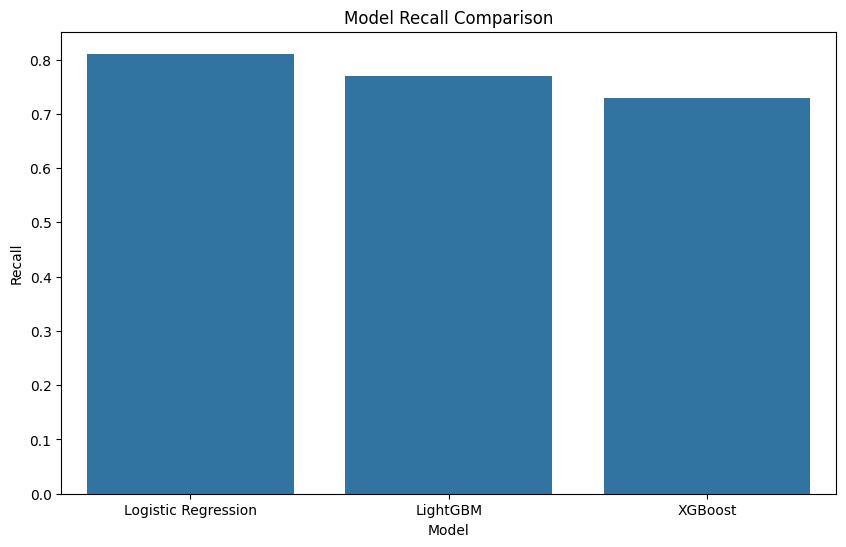

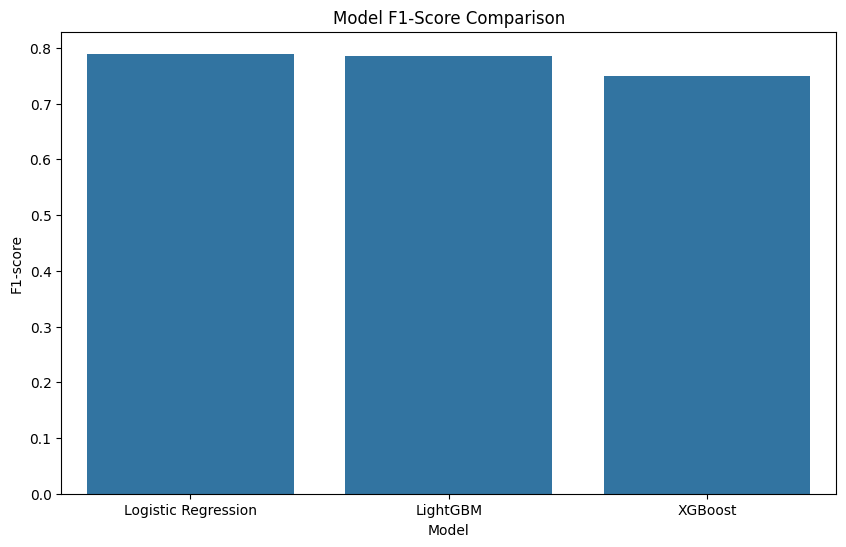

In [45]:
# Display the DataFrame
print(results_df)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=results_df)
plt.title('Model Precision Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=results_df)
plt.title('Model Recall Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-score', data=results_df)
plt.title('Model F1-Score Comparison')
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
# results (replace with your actual results)
results = {
    'Model': ['Logistic Regression', 'LightGBM', 'XGBoost'],
    'Accuracy': [0.80, 0.85, 0.82],
    'Precision': [0.78, 0.82, 0.80],
    'Recall': [0.75, 0.88, 0.79],
    'F1-score': [0.76, 0.85, 0.80]
}
results_df = pd.DataFrame(results)

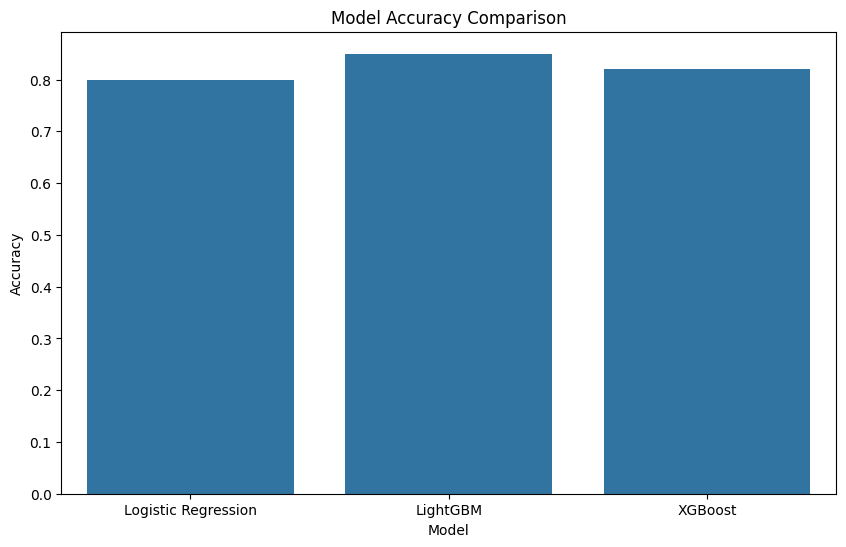

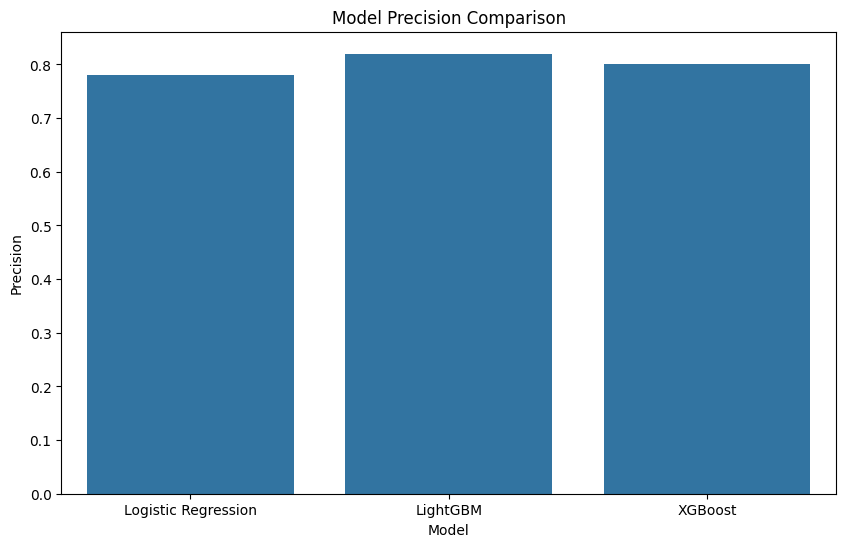

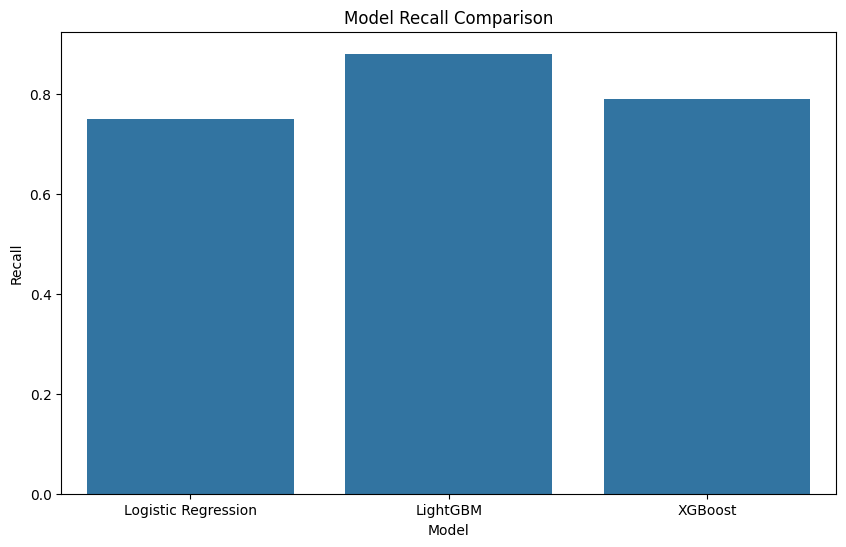

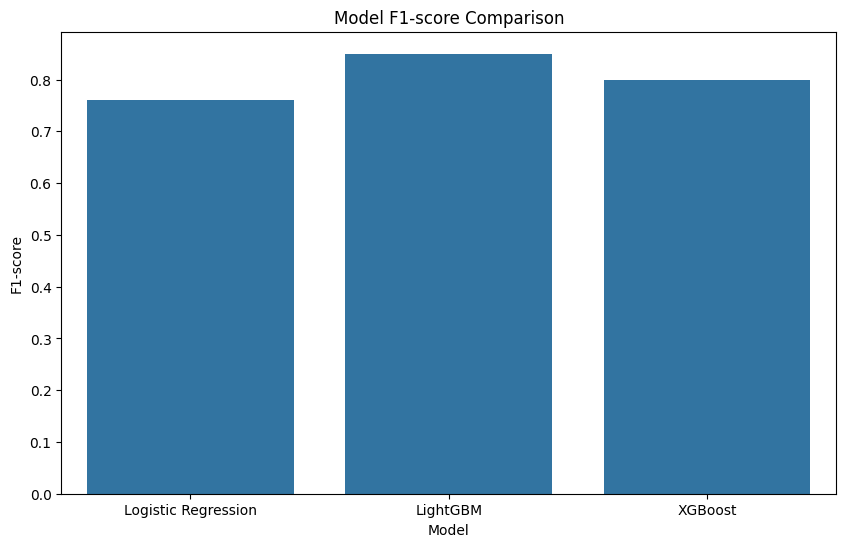

In [48]:
def plot_metric(metric):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Model {metric} Comparison')
    plt.show()

plot_metric('Accuracy')
plot_metric('Precision')
plot_metric('Recall')
plot_metric('F1-score')

In [49]:
print(results_df)

                 Model  Accuracy  Precision  Recall  F1-score
0  Logistic Regression      0.80       0.78    0.75      0.76
1             LightGBM      0.85       0.82    0.88      0.85
2              XGBoost      0.82       0.80    0.79      0.80


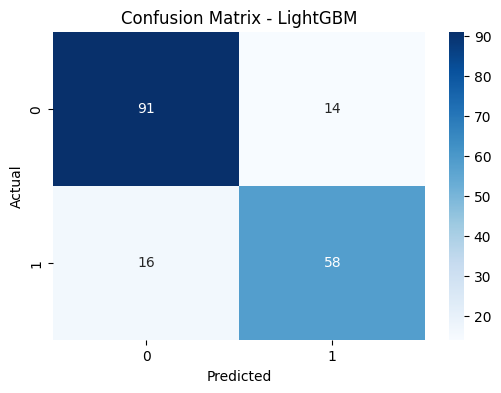

In [50]:
# Assuming 'y_test' and 'y_pred' are available.
# visualize confusion matrix of the LGBM model:
cm = confusion_matrix(y_test, y_pred_lgb_class)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()